In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import ipysheet as ips
import panel as pn
from scipy import stats 
pn.extension('katex', 'mathjax') 

### Tutorial 3 #

+ **solutions for homework problems 1 – 4**

+ **tutorial problems on effective conductivity and flow nets**

+ **homework problems on effective conductivity and flow nets**







### Solutions for Homework Problems 1 – 4 ###




Column
    [0] Markdown(str, style={'font-size': '13pt'}, width=800)
    [1] PNG(str, width=350)
    [2] Markdown(str, style={'font-size': '13pt'}, width=800)
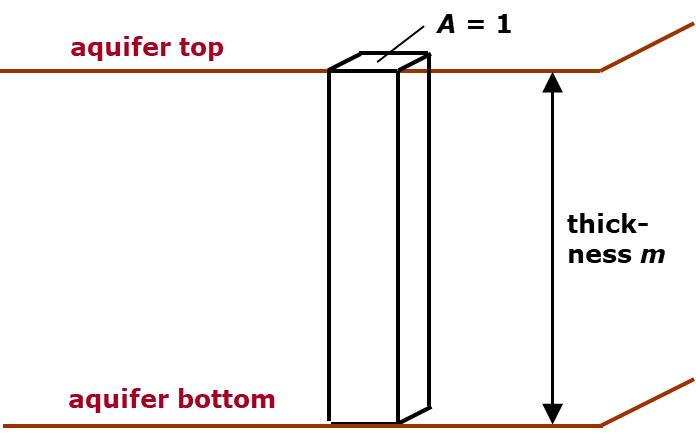

In [3]:
#
r1_1 = pn.pane.Markdown("""

### Homework Problem 1 ###

The pressure head in an aquifer extending over 200 km<sup>2</sup> is decreased by 1.60 m.
Determine the loss of groundwater in the aquifer for two scenarios:
A. The aquifer is unconfined (storage coefficient 0.13).
B. The aquifer is confined (storage coefficient 0.0005).

""",width = 800, style={'font-size': '13pt'})  

r1_2= pn.pane.PNG("images/T03_H1.png", width=350)
#r1_2 = pn.pane.PNG("images/T03_H1.PNG") 

### Tutorial Problem 7 – Solution ###

#<img src="images/T03_H1.PNG" alt="Grosser Garten Map"  width="40%" height="100%" >

r1_3 = pn.pane.Markdown(""" 
### Solution - Homework Problem 1 ###
""",width = 800, style={'font-size': '13pt'})  
pn.Column(r1_1, r1_2, r1_3)   

In [30]:
# Given 
A = 400 # km^2, aquifer area
D_h = 1.6 # m, head decrease
S_u = 0.13 # (-), Storativity unconfined aquifer
S_c = 0.0005 # (-) Storage coefficient, confined aquifer

# Solution
DV_wu = A*S_u*D_h * 10**6 # m^3 change in water volume unconfined aquifer
DV_wc = A*S_c*D_h* 10**6  # m^3 change in water volume unconfined aquifer

# output

print("Change in water volume in unconfined aquifer is: {0:1.1e}".format(DV_wu),"m\u00b3 \n")
print("Change in water volume in confined aquifer is: {0:1.1e}".format(DV_wc),"m\u00b3")

Change in water volume in unconfined aquifer is: 8.3e+07 m³ 

Change in water volume in confined aquifer is: 3.2e+05 m³


## Homework Problem 2

Conduct a sieve analysis for a dried soil sample (see data in the table below)

1. Draw the granulometric curve (cumulative mass distribution) and briefly characterise the sediment with regard to its major constituent(s).
2. What is the coefficient of uniformity? 


In [31]:
#
title = ["mesh   size  [mm] ", "residue in the sieve [g] ", "∑ total", "∑ / ∑total"]
Size = [6.3, 2, 0.63, 0.2, 0.063, "< 0.063 /cup"]
passed = [11, 62, 200, 180, 42, 10]
s2 = ips.sheet(rows=6, columns=4, row_headers=False, column_headers=title)
ips.column(0, Size, row_start=0) 
ips.column(1, passed, row_start=0); s2 

Sheet(cells=(Cell(column_end=0, column_start=0, row_end=5, row_start=0, squeeze_row=False, value=[6.3, 2, 0.63…

In [32]:
# Solution of problem 2

t_sample = np.sum(passed) # g, add the residue column to get total mass
retain_per = passed/t_sample *100 # %, # retain percentage residue/total mass
retain_per_cumsum =np.cumsum(retain_per) # get the cummulative sum of the reatined
passing_per = 100 - retain_per_cumsum # substract 100-cummsum to get passing % - the last column

#Output
s3 = ips.sheet(rows=6, columns=4, row_headers=False, column_headers=title)
ips.column(0, Size, row_start=0) 
ips.column(1, passed, row_start=0); 
ips.column(2, retain_per, row_start=0); 
ips.column(3, passing_per, row_start=0); s3 


Sheet(cells=(Cell(column_end=0, column_start=0, row_end=5, row_start=0, squeeze_row=False, value=[6.3, 2, 0.63…

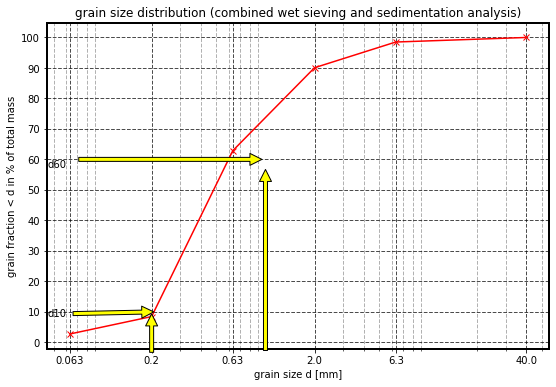

In [7]:
# Plotting granulometric curve

plt.rcParams['axes.linewidth']=2
plt.rcParams['grid.linestyle']='--'
plt.rcParams['grid.linewidth']=1
x = np.append([40], Size[:5])
y = np.append([100],passing_per[:5])
fig = plt.figure(figsize=(9,6));
plt.plot(x, y, 'x-', color='red'); 
tics=x.tolist()
plt.xscale('log');
plt.grid(which='major', color='k', alpha=0.7) 
plt.grid(which='minor', color='k', alpha=0.3)
plt.xticks(x, tics);  
plt.yticks(np.arange(0,110,10));
plt.title('grain size distribution (combined wet sieving and sedimentation analysis)');
plt.xlabel('grain size d [mm]');
plt.ylabel('grain fraction < d in % of total mass');

plt.annotate('d10', xy=(0.22, 10),  xycoords='data', xytext=(0.06, 11), arrowprops=dict(facecolor='yellow', shrink=0.05),horizontalalignment='right', verticalalignment='top',)
plt.annotate('d60', xy=(1.1, 60),  xycoords='data', xytext=(0.06, 60), arrowprops=dict(facecolor='yellow', shrink=0.05),horizontalalignment='right', verticalalignment='top',)
plt.annotate('', xy=(1, 60),  xycoords='data', xytext=(1, -6), arrowprops=dict(facecolor='yellow', shrink=0.05),horizontalalignment='right', verticalalignment='top',)
plt.annotate('', xy=(0.2, 10),  xycoords='data', xytext=(0.2, -4), arrowprops=dict(facecolor='yellow', shrink=0.05),horizontalalignment='right', verticalalignment='top',)
plt.rcParams["font.weight"] = "bold"   

mpl_pane = pn.pane.Matplotlib(fig, dpi=144)


In [8]:
# From the figure
d_10 = 0.22 # mm,approx, diameter 10% passing, see the arrow bottom in x-axis
d_60 = 1.0 # mm, approx diameter 10% passing, see the arrow bottom in x-axis

c_u = d_60/d_10 # [], coefficient of uniformity

#Output
print("The coefficient of uniformity is: {0:1.1f}".format(c_u)) 
r2_1 = pn.pane.Markdown("""
**Major constituents: coarse sand/medium sand** """, width=600, style={'font-size': '13pt', 'color': 'blue'} )
pn.Row(r2_1) 

The coefficient of uniformity is: 4.5


Row
    [0] Markdown(str, style={'font-size': '13pt', ...}, width=600)

Row
    [0] Markdown(str, style={'font-size': '13pt'})
    [1] Spacer(width=50)
    [2] PNG(str, width=500)
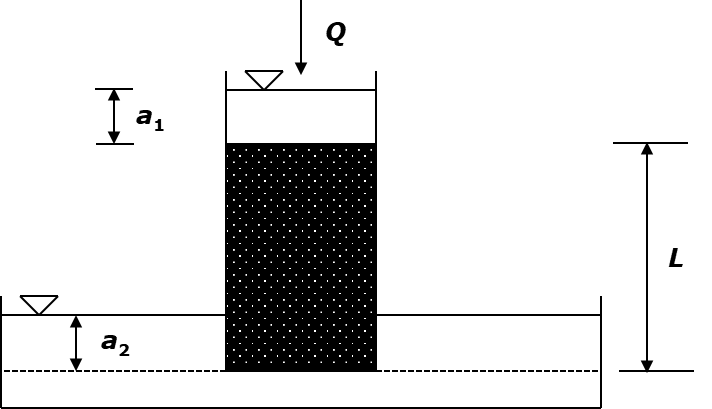

In [33]:
#
r3_1 = pn.pane.Markdown("""
## Homework Problem 3 ##


**A**. Derive an expression for hy-draulic conductivity K for the constant-head permeameter shown in the figure.<br><br>
**B**. The hydraulic conductivity of a sample (length 10 cm, dia-meter 4 cm) is to be determined. 
The water depths a<sub>1</sub> and a<sub>2</sub> equal 6 cm and 3 cm, resp. A water volume of 250 ml passed the sample during an experimental period of 36 s. <br> <br>
**C**. Which material could be con-tained in the sample?
""", style={'font-size': '13pt'})
spacer2=pn.Spacer(width=50)
r3_2 = pn.pane.PNG("images/T02_TH3.png", width=500)
pn.Row(r3_1,spacer2, r3_2)  

In [34]:
#
r3_3 = pn.pane.Markdown("""
### Solution of the Homework Problem 3 """, width = 700, style={'font-size': '13pt'}) 

r3_4 = pn.pane.LaTeX(r"""
General formula for constant-head permeameter:
$$
K = \frac{QL}{A(h_{in}-h_{out})}
$$
The column outlet is chosen as the reference level 
$z = 0$ with the $z-$axis pointing up-ward. As a consequence, we have $z = L$ at the inlet. <br>
""", style={'font-size': '13pt'})

r3_5 = pn.pane.Markdown("""
**at the outlet:** <br>
pressure head = _a<sub>2</sub>_ <br>
elevation head = 0 <br>
_h<sub>out</sub>_ = _a<sub>2</sub>_ <br>
""", width = 300, style={'font-size': '13pt'})

r3_6 = pn.pane.Markdown("""
**at the inlet:**<br>
pressure head = _a<sub>1</sub>_ <br>
elevation head = _L_<br>
_h<sub>in</sub>_ = _a<sub>1</sub>_ + _L_
<br><br>
""", width = 300, style={'font-size': '13pt'})

r3_7 = pn.pane.LaTeX(r"""
head difference: 
$h_{in}-h_{out} = a_{1} + L - a_{2}$<br><br>
hydraulic conductivity:
$
K = \frac{QL}{a_1 + L - a_2}
$
""",style={'font-size': '13pt'})

C1 = pn.Row(r3_5, r3_6)  

r3_2.object = "images/T03_TH3.png" 

pn.Column(r3_3, r3_4, C1, r3_7)  


Column
    [0] Markdown(str, style={'font-size': '13pt'}, width=700)
    [1] LaTeX(str, style={'font-size': '13pt'})
    [2] Row
        [0] Markdown(str, style={'font-size': '13pt'}, width=300)
        [1] Markdown(str, style={'font-size': '13pt'}, width=300)
    [3] LaTeX(str, style={'font-size': '13pt'})

In [11]:
# Problem 3b, Given are:
L = 10# cm, length of column 
a1 = 6# cm, pressure head at 1 
a2 = 3# cm, pressure head at 2 
d = 4 # cm, diameter of the column
Q = 250/36 # ml/s = 250 cm³/36s, discharge 
A = np.pi*(d/2)**2 # cm^2 Area of the column

#calculation
K = Q*L/(A*(a1+L-a2))# cm/s, Conductivity

#output
print("The conductivity of the column is:{0:1.3f}".format(K), "cm/s")
print("The conductivity of the column is:{0:1.3E}".format(K/100), "m/s")

r3_8 = pn.pane.Markdown("""
The sample in the column is: **Coarse sand - Fine gravel**
""", width=400)  

pn.Row(r3_8) 


The conductivity of the column is:0.425 cm/s
The conductivity of the column is:4.251E-03 m/s


Row
    [0] Markdown(str, width=400)

Row
    [0] Column
        [0] Markdown(str, style={'font-size': '13pt'})
        [1] PNG(str, width=400)
        [2] Markdown(str, style={'font-size': '13pt'})
        [3] Markdown(str, style={'font-size': '13pt'}, width=600)
    [1] PNG(str, width=350)
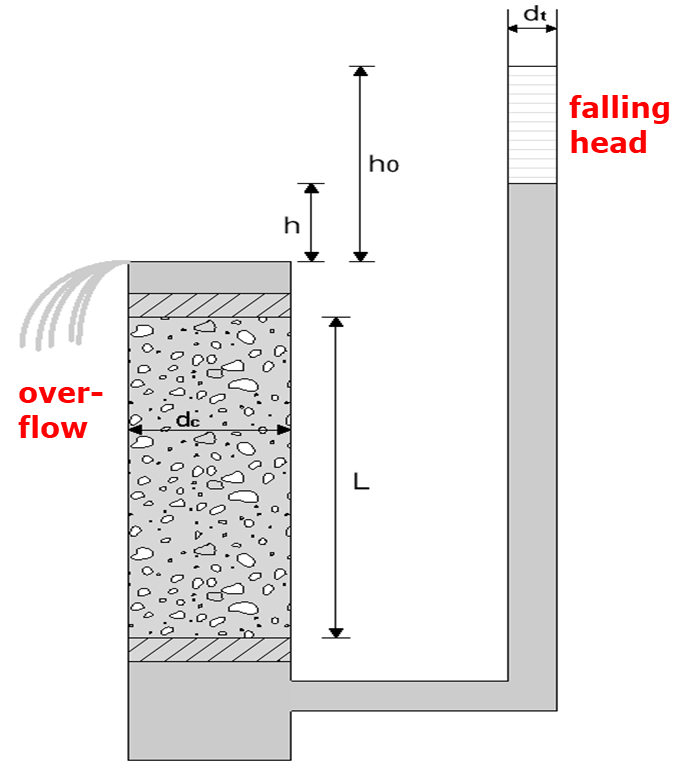
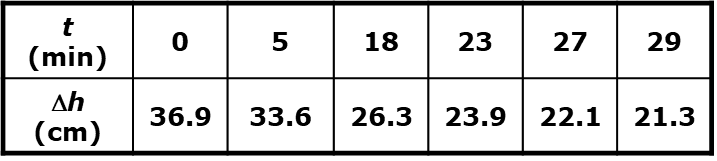

In [12]:
#
r_h4 = pn.pane.Markdown("""
A Darcy experiment is performed by a falling-head permeameter using water at 20°C. 
Length and diameter of the sample are 20 cm and 6 cm, resp. The inner tube dia-meter is 4 cm. 
The following data are available for the time-dependent hydraulic head difference : 
""", style={'font-size': '13pt'})

r_h4b = pn.pane.PNG("images/T02_TH4a.png", width=400)

r_h4c = pn.pane.Markdown("""
**A.** Convert times to seconds and plot the logarithm of the ratios of head differences ln(Δh(0)/Δh(t)) vs. time t. 
(Use the coordinate system on next page). <br><br>
**B.** Determine the slope of the correspon-ding regression line.<br><br>
**C.** Determine hydraulic conductivity K.<br><br>
**D.** Determine intrinsic permeability k.<br>
""", style={'font-size': '13pt'})

r_h4f = pn.pane.Markdown("""
##Solution of Homework Problem 4
""", width= 600, style={'font-size': '13pt'})

r_h4d = pn.Column(r_h4, r_h4b, r_h4c,  r_h4f)
r_h4e = pn.pane.PNG("images/T02_TP10.png", width=350)
spacer2=pn.Spacer(width=50)


pn.Row(r_h4d, r_h4e)  

Row
    [0] LaTeX(str, style={'font-size': '13pt'})
    [1] Spacer(width=50)
    [2] Matplotlib(Figure)
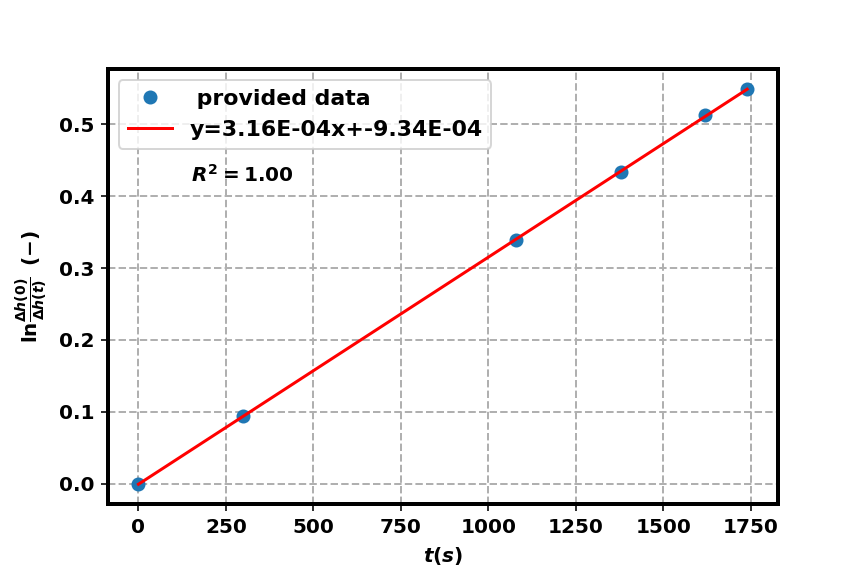

In [13]:
#
r4_1 = pn.pane.LaTeX(r"""
The formula for variable-head permeameter:
$$K = \frac{d_t^2 L}{d_t^2 t} \cdot \ln \frac{ h_{in}(0)-h_{out}}{h_{in}(t) - h_{out}} = \frac{d_t^2 L}{d_e^2 t}\cdot \ln\frac{\Delta h(0)}{\Delta h(t)}$$
Rearrangement shows that the natural logarithm of $\Delta h(0)/\Delta h(t)$ depends linearly on time $t$: 
$$
\ln\frac{\Delta h(0)}{\Delta h(t)} = \frac{K \cdot d_e^2 L}{L\cdot d_t^2} \cdot t
$$
$$\text{slope} =\frac{K\cdot d_e^2}{L\cdot d_t^2}$$
$$K = L \frac{d_t^2 }{d_e^2}\cdot \text{slope}$$
""",style={'font-size': '13pt'} )

# Given data
t = np.array([0, 5, 18, 23, 27, 29]) # min, given time
Dh = np.array([36.9, 33.6, 26.3, 23.9, 22.1, 21.3]) # cm, head difference 

t_s = t*60 # s, time in second
Dh0_Dht = Dh[0]/Dh # (-), Delta h(0)/Delta h(t)
ln_Dhodht = np.log(Dh0_Dht)# (-), ln(Delta h(0)/Delta h(t))
slope, intercept, r_value, p_value, std_err = stats.linregress(t_s, ln_Dhodht) # linear regression
pn.Row(r4_1)

fig = plt.figure()
plt.plot(t_s, ln_Dhodht, 'o', label=' provided data');
pred = intercept + slope*t_s
plt.plot(t_s, pred, 'r', label='y={:.2E}x+{:.2E}'.format(slope,intercept)) ;
plt.xlabel(r"$t (s)$");
plt.ylabel(r"$\ln\frac{\Delta h (0)}{\Delta h (t)}\;\:(-)$");
plt.grid();
plt.legend(fontsize=11) 
plt.text(150, 0.42,'$R^2 = %0.2f$' % r_value)
plt.close() # otherwise we have 2 figure
r4_2 = pn.pane.Matplotlib(fig, dpi=144)
pn.Row(r4_1, spacer2, r4_2)  
 

In [14]:
#
#Solution of 4C
# Given 
L = 20 # cm, Length of the column
d_t = 4 # cm, diameter of the tube
d_c = 6# cm, diameter of the column
slope = 3.14e-04 # 1/s, from fitting see plot

K = L*(d_t**2/d_c**2)*slope # cm/s, conductivity calculated using eqn from previous slide

print("The conductivity in the column is: {0:1.2E}".format(K), "cm/s\n")
print("The conductivity in the column is: {0:1.2E}".format(K/100), "m/s\n")

#Solution of 4D
# Given
rho_w = 998.2 # kg/m^3, density of water
eta_w = 1.0087E-3# kg/(m-s), viscocity of water
g = 9.81 # m/s^2, accl. due to gravity

k = K/100*eta_w/(rho_w*g)# m^2, K = k*ρ/n
k_D = k/0.987E-12 # D, 1D = 0.987E10-12 m^2

print("The permeability of the media is: {0:1.2E}".format(k), "m\u00b2 \n")  
print("The permeability of the media in Darcy's unit is: {0:1.2f}".format(k_D), "D")  

The conductivity in the column is: 2.79E-03 cm/s

The conductivity in the column is: 2.79E-05 m/s

The permeability of the media is: 2.88E-12 m² 

The permeability of the media in Darcy's unit is: 2.91 D


In [15]:
#
r5_1 = pn.pane.Markdown("""
#Tutorial Problems on Effective Conductivity and Flow Nets
""", width = 900) 

r5_2 = pn.pane.Markdown("""
###Tutorial Problem 11: Effective Hydraulic Conductivity
A sandy layer with a thickness of 2.5 m is embedded between two gravel layers. B
oth gravel layers have a thickness of 1.5 m and a hydraulic conductivity of 3.7·10<sup>-3</sup> m/s. 
Steady-state groundwater flow is in parallel to the layering. 
A hydraulic gradient of 0.001 and an overall discharge of 1 m³/d per unit width have been determined.

a. Determine the effective hydraulic conductivity.<br><br>
b. What is the hydraulic conductivity of the sand layer?<br><br>
c. Which effective hydraulic conductivity would be obtained if flow was assumed perpendicular to the layering?<br><br>
d. Calculate effective hydraulic conductivity if the angle between the flow direction and the layering equals 45°.
""", style={'font-size': '13pt'})

pn.Column(r5_1, r5_2)  

Column
    [0] Markdown(str, width=900)
    [1] Markdown(str, style={'font-size': '13pt'})

Row
    [0] PNG(str, width=400)
    [1] Spacer(width=50)
    [2] LaTeX(str, style={'font-size': '13pt'})
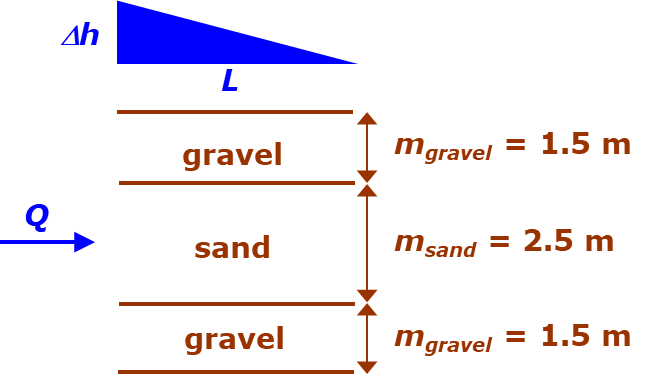

In [16]:
r5_3 = pn.pane.PNG("images/T03_TP11_a.png", width=400)
r5_4 = pn.pane.LaTeX(r"""
Known relationships are:
$$
Q = WmK\frac{\Delta H}{L}
$$
$$
K = \frac{Q/W}{m\cdot \Delta H \cdot L}
$$
Weighted arithmetic mean to determine hydraulic conductivity for sand:

$$
K = \frac{1}{m}\sum_{i=1}^n m_i\cdot K_i
$$
where $i$ is different layers
""", style={'font-size': '13pt'})


pn.Row(r5_3, spacer2, r5_4)  

In [17]:
#Given
Q = 1 # m^3/d, discharge
W = 1 # m, per unit width
K_g = 3.7*1E-3# m/s, conductivity of gravel layer 
m_g = 1.5 # m, thickness of gravel layer
m_s = 2.5 # m, thickness of sand layer
m = 2*m_g + m_s # m. total thickness of aquifer
Dh_L = 0.001 # (-), hydraulic gradient


#Solution of 11a
Keff_h = (Q/W)/(m*Dh_L) # m/d, conductivity
Keff_hs = Keff_h/(24*3600)# m/s, conductivity 

#Solution of 11b
# K_eff = (2*m_g*K_g + m_s*K_g)/m

K_s = ((m*Keff_hs - 2*m_g*K_g))/m_s  

print("Effective horizontal hydraulic conductivity (Keff_h) = {0:1.2f}".format(Keff_h), "m/d\n" ) 
print("Effective horizontal hydraulic conductivity (Keff_hs) = {0:1.3E}".format(Keff_hs), "m/s\n" )
print("Hydraulic conductivity of sand layer (K_s) = {0:1.1E}".format(K_s), "m/s" )     

Effective horizontal hydraulic conductivity (Keff_h) = 181.82 m/d

Effective horizontal hydraulic conductivity (Keff_hs) = 2.104E-03 m/s

Hydraulic conductivity of sand layer (K_s) = 1.9E-04 m/s


Row
    [0] Column
        [0] PNG(str, width=200)
        [1] PNG(str, width=200)
    [1] Spacer(width=50)
    [2] LaTeX(str, style={'font-size': '13pt'})
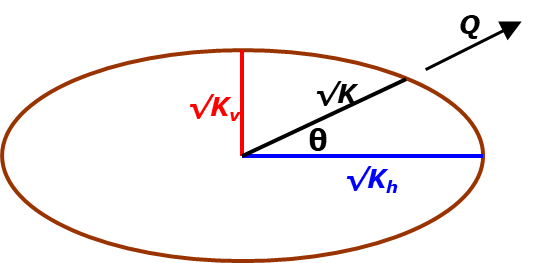
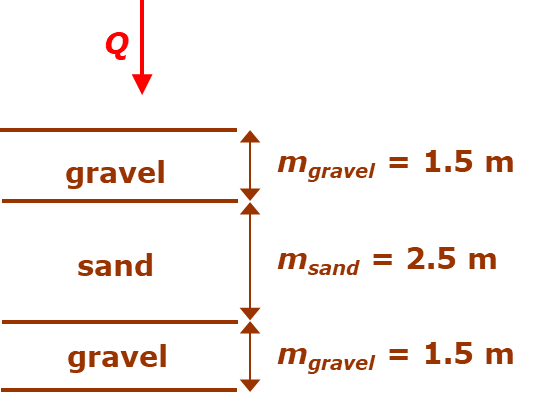

In [18]:
r5_5 = pn.pane.PNG("images/T03_TP11_b.png", width=200) 
r5_6 = pn.pane.PNG("images/T03_TP11_c.png", width=200) 

r5_7 = pn.Column(r5_5, r5_6) 

r5_8 = pn.pane.LaTeX(r"""
Vertical effective conductivity is given by weighted harmoninc mean
$$
K = \frac{m}{2\cdot \frac{m_g}{K_g} + \frac{m_s}{K_s} }
$$
<br>
For inclined aquider the effective conductivity is:

$$
K = \frac{1}{\frac{\cos^2\theta}{K_h} + \frac{\sin^2\theta}{K_v}}
$$

""", style={'font-size': '13pt'})

pn.Row(r5_7,spacer2, r5_8) 

In [19]:
# Solution of 11c
Keff_v = m/(2*(m_g/K_g)+ (m_s/K_s))

#Given 
theta = 45 # theta 
theta_r = 45*(np.pi)/180 # degree to radian conversion
K_h = Keff_hs # m/s, solution from 11a
K_v = Keff_v # m/s, solution from 11c

# solution from 11d
Keff_i = 1/((np.cos(theta_r)**2/K_h)+(np.sin(theta_r)**2/K_v))


print("Effective vertical hydraulic conductivity (Keff_v) = {0:1.2E}".format(Keff_v), "m/s\n" ) 
print("Effective inclined hydraulic conductivity (Keff_i) = {0:1.2E}".format(Keff_i), "m/s" ) 


Effective vertical hydraulic conductivity (Keff_v) = 3.93E-04 m/s

Effective inclined hydraulic conductivity (Keff_i) = 6.62E-04 m/s


Row
    [0] Markdown(str, style={'font-size': '13pt'}, width=400)
    [1] Spacer(width=50)
    [2] PNG(str, width=400)
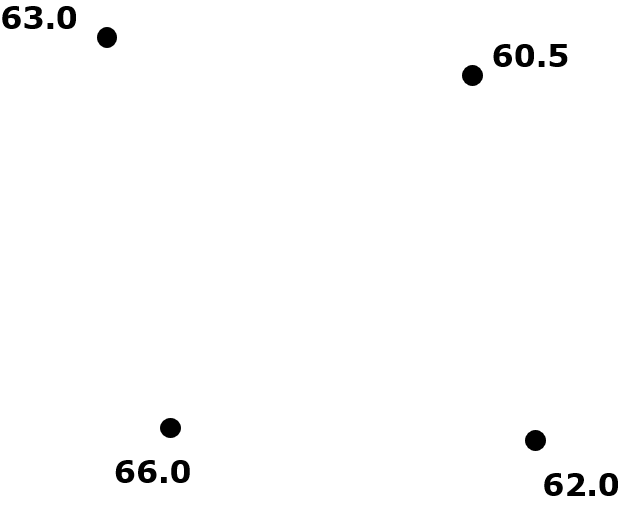

In [35]:
#
r6_1 = pn.pane.Markdown("""
### Tutorial Problem 12: Hydrologic Triangle
The figure below shows the position of four groundwater observation wells with measured hydraulic heads in m a.s.l. 
<br> <br>
**a.** Sketch head isolines for intervals of 1 m by applying the hydrologic triangle method.<br><br>
**b.** Indicate the flow direction.

""",width = 400, style={'font-size': '13pt'})

r6_2 = pn.pane.PNG("images/T03_TP12_a.png", width=400) 

pn.Row(r6_1,spacer2, r6_2) 


In [36]:
# 
r6_3 = pn.pane.Markdown("""
### Solution of Tutotrial Problem 12

Step 1. Connects all the points
""", width=600)

r6_2.object = "images/T03_TP12_b.png"
r6_3

Markdown(str, width=600)

In [37]:
#
r6_4 = pn.pane.Markdown("""
### Solution of Tutotrial Problem 12
Step 2. Divide the connected lines at equal head-level (here = 1 m)
""", width=600)
r6_2.object = "images/T03_TP12_c.png"

In [38]:
#
r6_4 = pn.pane.Markdown("""
### Solution of Tutotrial Problem 12
Step 3. Join all the equal head lines 
""", width=600)
r6_2.object = "images/T03_TP12_d.png"

In [39]:
r6_4 = pn.pane.Markdown("""
### Solution of Tutotrial Problem 12
Step 4. Mark the flow direction from higher head towards lower head
""", width=600)
r6_2.object = "images/T03_TP12_e.png"

Column
    [0] Markdown(str, style={'font-size': '13pt'}, width=800)
    [1] Row
        [0] Column
            [0] Markdown(str, style={'font-size': '13pt'}, width=400)
            [1] PNG(str, width=200)
        [1] Column
            [0] Markdown(str, style={'font-size': '13pt'}, width=400)
            [1] PNG(str, width=200)
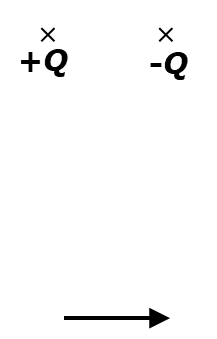
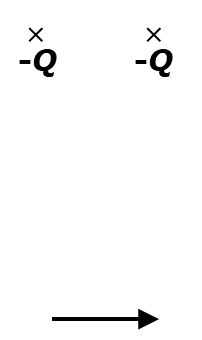

In [25]:
#
r7_1 = pn.pane.Markdown("""
Tutorial Problem 13: Flow Nets
Sketch head isolines and streamlines for the two configurations a) and b) of a well doublette shown below. In both cases flow nets should be sketched without and with the uniform flow component.

""",width=800,  style={'font-size': '13pt'})

r7_2 = pn.pane.Markdown("""
 a) withdrawal at both wells:<br><br><br>
""",width=400,  style={'font-size': '13pt'})

r7_3 = pn.pane.PNG("images/T03_TP13_a.png", width=200)  

r7_4 = pn.Column(r7_2,r7_3)

r7_5 = pn.pane.Markdown("""
 b) withdrawal at both wells:<br><br><br>
""",width=400,  style={'font-size': '13pt'})

r7_6 = pn.pane.PNG("images/T03_TP13_b.png", width=200)  

r7_7 = pn.Column(r7_5,r7_6)
r7_8 = pn.Row(r7_4, r7_7) 
pn.Column(r7_1, r7_8) 

In [26]:
r8_1= pn.pane.Markdown("""
#Homework Problems on  Effective Conductivity and Flow Nets <br><br><br> 
""", width = 800, style={'font-size': '13pt'})


r8_2= pn.pane.Markdown("""
#There is no obligation to solve homework problems!
""", width = 800, style={'font-size': '13pt', 'color':'red'})

pn.Column(r8_1,r8_2)  

Column
    [0] Markdown(str, style={'font-size': '13pt'}, width=800)
    [1] Markdown(str, style={'font-size': '13pt', ...}, width=800)

In [40]:
#
r9_1= pn.pane.Markdown("""
###Homework Problem 5: Effective Hydraulic Conductivity
A gravel layer with a thickness of 2.5 m is embedded between two sand layers. Both sand layers have a thickness of 
1.5 m and a hydraulic conductivity of 3.7·10<sup>-4</sup> m/s. Steady-state groundwater flow is perpendicular to the layering. 
An overall head difference of 5.5 cm and a discharge of 500 l/d per unit area have been determined <br><br>

**a.** Determine the effective hydraulic conductivity.<br><br>
**b.** What is the hydraulic conductivity of the gravel layer?<br><br>
**c.** Which effective hydraulic conductivity would be obtained if flow was assumed to be in parallel with the layering?<br><br>
**d.** Calculate effective hydraulic conductivity if the angle between the flow direction and the layering equals 30°. <br>

""", width = 900, style={'font-size': '13pt'})
r9_1


Markdown(str, style={'font-size': '13pt'}, width=900)

Row
    [0] Markdown(str, style={'font-size': '13pt'}, width=500)
    [1] PNG(str, width=400)
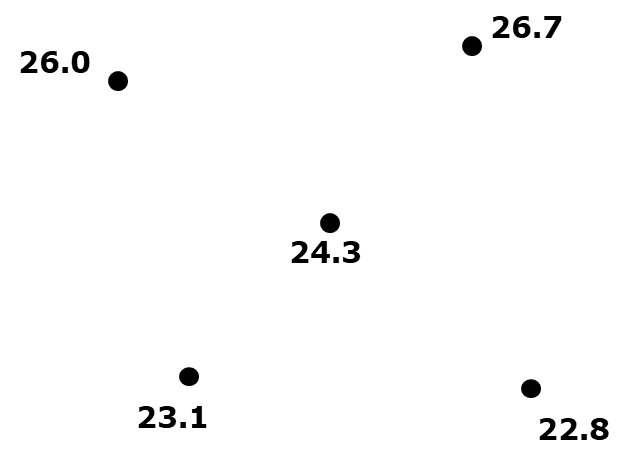

In [28]:
#
r10_1= pn.pane.Markdown("""
###Homework Problem 6: Hydrologic Triangle
The figure below shows the position of five groundwater observation wells with measured hydraulic heads in m a.s.l. 
 <br><br>

**a.** Sketch head isolines for intervals of 1 m by applying the hydrologic triangle method.
<br><br>
**b.** Indicate the flow direction.<br><br>
""", width = 500, style={'font-size': '13pt'})
r10_2 = pn.pane.PNG("images/T03_TH6.png", width=400)  

pn.Row(r10_1, r10_2)

Column
    [0] Markdown(str, style={'font-size': '13pt'}, width=900)
    [1] PNG(str, width=400)
    [2] Markdown(str, style={'font-size': '13pt'}, width=900)
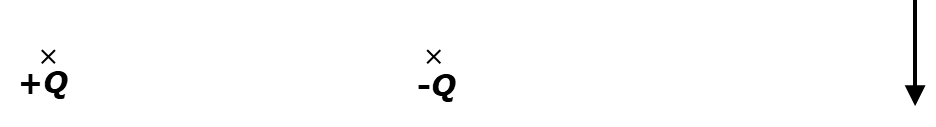

In [29]:
#
r11_1= pn.pane.Markdown("""
###Homework Problem 7: Flow Nets
Sketch head isolines and streamlines for the well doublette shown below. 
In this case, injection and withdrawal of groundwater is superimposed to a uniform flow component.
 <br><br><br><br><br><br>
 """, width = 900, style={'font-size': '13pt'})

r11_2 = pn.pane.PNG("images/T03_TH7.png", width=400)  

r11_3= pn.pane.Markdown("""
 <br><br><br><br><br><br>
 """, width = 900, style={'font-size': '13pt'})
pn.Column(r11_1, r11_2, r11_3)